# Clustering Crypto

In [22]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.
# YOUR CODE HERE
df = pd.read_csv('Resources/crypto_data.csv', index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.tail()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000
PUNK,SteamPunk,PoS,False,PoS,NaN,40000000


In [4]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
df = df.loc[(df['IsTrading']==True)]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Keep all the cryptocurrencies that have a working algorithm.
# YOUR CODE HERE
# df = df.dropna()
# df.head()

In [6]:
# Remove the "IsTrading" column. 
# YOUR CODE HERE
df.drop(columns=["IsTrading"], inplace=True)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [9]:
# Remove rows that have at least 1 null value.
# YOUR CODE HERE
df.dropna()
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [10]:
# Keep the rows where coins are mined.
# YOUR CODE HERE
df = df.loc[(df['TotalCoinsMined']>0)]
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [14]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# YOUR CODE HERE
crypto_name_df = df[["CoinName"]]
crypto_name_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [15]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
# YOUR CODE HERE
crypto_df = df.drop(columns=["CoinName"], inplace=False)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [16]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
dummies = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
crypto_scaled = StandardScaler().fit_transform(dummies)

### Deliverable 2: Reducing Data Dimensions Using PCA

In [18]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [41]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
crypto_pca_df = pd.DataFrame(data= crypto_pca, 
                             columns= ["PC 1", "PC 2", "PC 3"],
                            index=crypto_df.index)
crypto_pca_df.head()

,PC 1,PC 2,PC 3
42,-0.339572,1.016820,-0.601815
404,-0.322907,1.016993,-0.602171
1337,2.315789,1.729250,-0.617133
BTC,-0.148651,-1.340737,0.163082
ETH,-0.138058,-1.990052,0.393858


In [42]:
pca.explained_variance_ratio_

array([0.02793082, 0.02140463, 0.02050306])

### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [43]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [44]:
# Initialize the K-Means model.
# YOUR CODE HERE
model = KMeans(n_clusters=4, random_state=5)

# Fit the model
model.fit(crypto_pca_df)

# Predict clusters
predictions = model.predict(crypto_pca_df)
print(predictions)

[0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 3 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 1 1 1 1 0 3 3 1 1 1 0 3 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 3 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 

In [45]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.merge(crypto_df, crypto_pca_df,left_index=True, right_index=True)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE
clustered_df["CoinName"]= crypto_name_df["CoinName"]

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.339572,1.016820,-0.601815,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.322907,1.016993,-0.602171,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.315789,1.729250,-0.617133,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.148651,-1.340737,0.163082,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.138058,-1.990052,0.393858,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.170870,-1.154810,-0.057250,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.388970,1.287023,-0.455253,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.147329,-2.236742,0.423871,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.136498,-1.990149,0.393839,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.125076,-1.914627,0.537568,ZCash,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

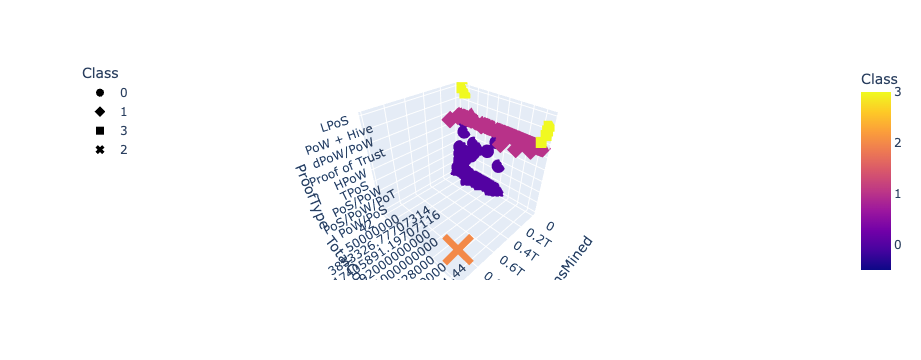

In [50]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df, 
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    z="ProofType",
    color="Class",
    symbol="Class",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    width=800,)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()


In [58]:
# Create a table with tradable cryptocurrencies.
table_df = clustered_df[["CoinName","Algorithm","ProofType","TotalCoinSupply","TotalCoinsMined","Class"]]
table= table_df.hvplot.table(sortable=True, selectable=True)
table

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [59]:
table = clustered_df.hvplot.table(columns=["CoinName","Algorithm","ProofType","TotalCoinSupply","TotalCoinsMined","Class"],
                                  width=600, height=120)
table 

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [62]:
# Print the total number of tradable cryptocurrencies.
clustered_df["CoinName"].count()

532

In [65]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
coins_df = clustered_df[["TotalCoinSupply","TotalCoinsMined"]]
# coins_df.head()
coins_scaled = MinMaxScaler().fit_transform(coins_df)
coins_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [68]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
coins_scaled_df = pd.DataFrame(coins_scaled, index=clustered_df.index, columns=coins_df.columns)
coins_scaled_df.head()

,TotalCoinSupply,TotalCoinsMined
42,4.200000e-11,0.000000
404,5.320000e-04,0.001066
1337,3.141593e-01,0.029576
BTC,2.100000e-05,0.000018
ETH,0.000000e+00,0.000109


In [69]:
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
coins_scaled_df["CoinName"]=clustered_df["CoinName"]
coins_scaled_df.head()

,TotalCoinSupply,TotalCoinsMined,CoinName
42,4.200000e-11,0.000000,42 Coin
404,5.320000e-04,0.001066,404Coin
1337,3.141593e-01,0.029576,EliteCoin
BTC,2.100000e-05,0.000018,Bitcoin
ETH,0.000000e+00,0.000109,Ethereum


In [70]:
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
coins_scaled_df["Class"]=clustered_df["Class"]

coins_scaled_df.head()

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,1
ETH,0.000000e+00,0.000109,Ethereum,1


In [72]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
coins_scaled_df.hvplot.scatter(
    x="TotalCoinSupply",
    y="TotalCoinsMined",
    hover_cols=["CoinName"],
    by="Class",
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinSupply]   (TotalCoinsMined,CoinName)